# Project name : Communicate Data Findings [ Dataset : Loan Data from prosper]


## by (Kareem Negm)

## Preliminary Wrangling

> This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.
>We will analyze this data and find out which factors affect the loans and create a complete analysis of all available items. 


In [4]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [5]:
#load the dataset 
df=pd.read_csv('ProsperLoanData.csv')
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [6]:
#shape of data 
df.shape


(113937, 81)

In [7]:
#data information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [8]:
#statistics of data 
df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [9]:
# drop coulmns with empty values or not usefu info from the dataset 
df.drop(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade', 'ClosedDate', 'CurrentlyInGroup', 'GroupKey', 'DateCreditPulled', 'FirstRecordedCreditLine', 'LoanKey', 'TotalProsperLoans', 'TotalProsperPaymentsBilled', 'OnTimeProsperPayments', 'ProsperPaymentsLessThanOneMonthLate', 'ProsperPaymentsOneMonthPlusLate', 'ProsperPrincipalBorrowed', 'ProsperPrincipalOutstanding', 'ScorexChangeAtTimeOfListing', 'LoanCurrentDaysDelinquent', 'LoanFirstDefaultedCycleNumber'], axis=1, inplace = True)

In [10]:
df.shape 


(113937, 61)

In [11]:
df.head(10)

,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,36,Completed,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,36,Current,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,36,Completed,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,36,Current,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,36,Current,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
5,60,Current,0.15425,0.1314,0.1214,0.11567,0.0449,0.07077,5.0,B,...,-25.33,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
6,36,Current,0.31032,0.2712,0.2612,0.23820,0.1275,0.11070,2.0,E,...,-22.95,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
7,36,Current,0.23939,0.2019,0.1919,0.17830,0.0799,0.09840,4.0,C,...,-69.21,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
8,36,Current,0.07620,0.0629,0.0529,0.05221,0.0099,0.04231,7.0,AA,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
9,36,Current,0.07620,0.0629,0.0529,0.05221,0.0099,0.04231,7.0,AA,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


In [12]:
sum(df.duplicated())

0

In [13]:
df.isnull().sum()

Term                                      0
LoanStatus                                0
BorrowerAPR                              25
BorrowerRate                              0
LenderYield                               0
EstimatedEffectiveYield               29084
EstimatedLoss                         29084
EstimatedReturn                       29084
ProsperRating (numeric)               29084
ProsperRating (Alpha)                 29084
ProsperScore                          29084
ListingCategory (numeric)                 0
BorrowerState                          5515
Occupation                             3588
EmploymentStatus                       2255
EmploymentStatusDuration               7625
IsBorrowerHomeowner                       0
CreditScoreRangeLower                   591
CreditScoreRangeUpper                   591
CurrentCreditLines                     7604
OpenCreditLines                        7604
TotalCreditLinespast7years              697
OpenRevolvingAccounts           

In [14]:
#remove loans without ProsperScores
df2 = df[df['ProsperScore'].isnull()==False]

In [15]:
df2.isnull().sum()

Term                                     0
LoanStatus                               0
BorrowerAPR                              0
BorrowerRate                             0
LenderYield                              0
EstimatedEffectiveYield                  0
EstimatedLoss                            0
EstimatedReturn                          0
ProsperRating (numeric)                  0
ProsperRating (Alpha)                    0
ProsperScore                             0
ListingCategory (numeric)                0
BorrowerState                            0
Occupation                            1333
EmploymentStatus                         0
EmploymentStatusDuration                19
IsBorrowerHomeowner                      0
CreditScoreRangeLower                    0
CreditScoreRangeUpper                    0
CurrentCreditLines                       0
OpenCreditLines                          0
TotalCreditLinespast7years               0
OpenRevolvingAccounts                    0
OpenRevolvi

### What is the structure of your dataset?

> Here we see a large set of data from 81 columns and 113,937 people who took out loans. 
Each class expresses someone who has taken out a loan and has 81 important information, we're going to try to use this information in this project. 

### What is/are the main feature(s) of interest in your dataset?

> I think one of the main features of the data is the Borrower APR and the interest rate 
We can analyze them with a lot of factors like score, occupation and income
where these factors can change each other 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The Prosper Rating 
and Prosperscore
They have a big impact on Borrower's APR because the high rating reflects the nature of the person who will borrow and Creditscore can also have an impact on orrower's APR

## Univariate Exploration


In [16]:
base_color = sb.color_palette()[0];

In [17]:
#see what is BorrowerAPR most count 
df2.BorrowerAPR.value_counts().head()

0.35797    3672
0.35643    1644
0.30532     902
0.29510     747
0.35356     721
Name: BorrowerAPR, dtype: int64

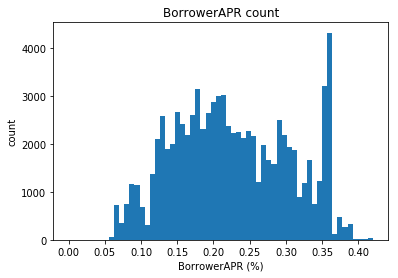

In [18]:
#counts for all BorrowerAPR values
bins = np.arange(0, df2['BorrowerAPR'].max(), 0.007)
plt.hist(data = df2, x = 'BorrowerAPR', bins = bins)
plt.title('BorrowerAPR count')
plt.xlabel('BorrowerAPR (%)')
plt.ylabel('count')
plt.xticks(np.arange(0, df2['BorrowerAPR'].max(), 0.05));

> Distribution is considered normal except in a specific period in which the distribution is interesting, which is the period when the value of BorrowerAPR  between0.35797% and 0.35643%.

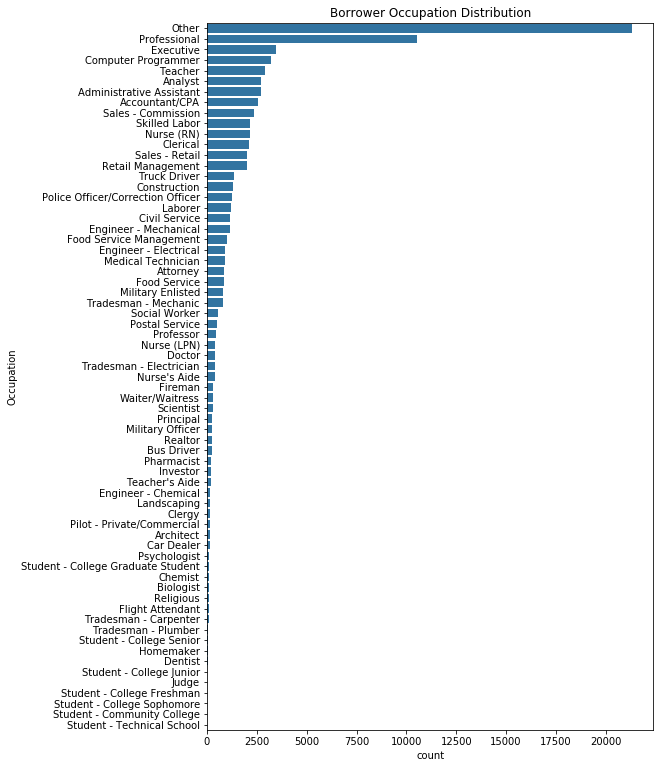

In [19]:
#top occupations of borrowers
order = df2.Occupation.value_counts().index
plt.figure(figsize=[8, 13])
sb.countplot(data=df2,y='Occupation',color=base_color, order=order);
plt.title('Borrower Occupation Distribution');

> We note that most loan applicants said that the professions are "others" or "professional" because they often do not want to share this information and may have said that they are professionals to enhance their chances of obtaining a loan
The rest of the arguments don't show much difference. 

In [20]:
df2.ProsperScore.value_counts()

4.0     12595
6.0     12278
8.0     12053
7.0     10597
5.0      9813
3.0      7642
9.0      6911
2.0      5766
10.0     4750
11.0     1456
1.0       992
Name: ProsperScore, dtype: int64

Text(0.5, 1.0, 'Prosper_Score_Distribution')

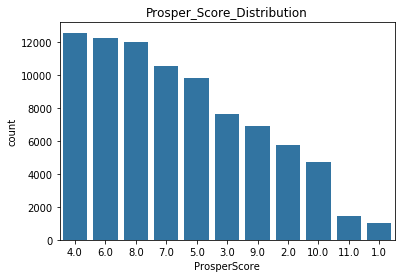

In [21]:
#Prosper Score Distribution
order = df2.ProsperScore.value_counts().index
sb.countplot(data=df2,x='ProsperScore',color=base_color, order=order);
plt.title('Prosper_Score_Distribution')


> We note here that the less prosper score for borrowers, the less the loan they got, we can easily notice that there is a strong satisfaction relationship between 

In [22]:
#Let's see what the loan original amount and what it's like.
df2['LoanOriginalAmount'].value_counts()

4000     13233
15000    11460
10000     9816
2000      4591
5000      4224
3000      3451
20000     2928
25000     2788
7000      2292
7500      2177
6000      2043
8000      1899
2500      1848
3500      1674
12000     1571
13000     1388
9000      1312
6500      1000
4500       973
8500       865
1000       761
11000      649
5500       641
14000      528
11500      524
9500       493
1500       475
35000      430
18000      396
12500      346
         ...  
3369         1
5546         1
11821        1
34679        1
16160        1
13792        1
10914        1
7845         1
12003        1
3879         1
12131        1
14304        1
4133         1
18542        1
10466        1
6564         1
6692         1
6948         1
24300        1
11170        1
5029         1
7268         1
9443         1
5349         1
7524         1
19950        1
1575         1
5733         1
11938        1
8196         1
Name: LoanOriginalAmount, Length: 1934, dtype: int64

In [23]:
df2['LoanOriginalAmount'].describe()

count    84853.000000
mean      9083.440515
std       6287.860058
min       1000.000000
25%       4000.000000
50%       7500.000000
75%      13500.000000
max      35000.000000
Name: LoanOriginalAmount, dtype: float64

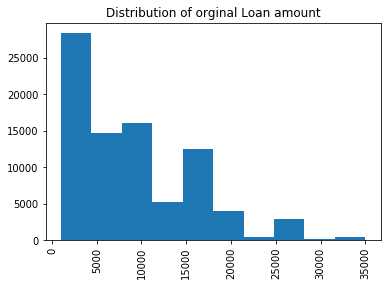

In [24]:
# Distribution of orginal Loan amount
plt.hist(data=df2,x='LoanOriginalAmount',color=base_color);
plt.title('Distribution of orginal Loan amount')
plt.xticks(rotation=90);

> The distribution seems to make a little sense, other than some points, like 10000 and 15000.

In [25]:
#Distribution of ProsperRating_mean
df2['ProsperRating (Alpha)'].value_counts()

C     18345
B     15581
A     14551
D     14274
E      9795
HR     6935
AA     5372
Name: ProsperRating (Alpha), dtype: int64

Text(0.5, 1.0, 'Count of Prosper ratings')

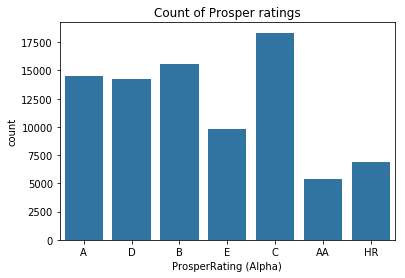

In [26]:
# Distribution of Prosper rating
sb.countplot(data=df2,x='ProsperRating (Alpha)',color=base_color);
plt.title('Count of Prosper ratings')

Let's see what relationships are between ProsperRatingmean vs BorrowerAPR 

In [27]:
ProsperRatmean  = df2.groupby('ProsperRating (Alpha)').BorrowerAPR.mean()

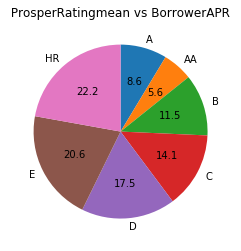

In [28]:
plt.pie(ProsperRatmean, labels = ProsperRatmean.index, startangle = 90,
    counterclock = False, autopct='%1.1f');
plt.title(' ProsperRatingmean vs BorrowerAPR ');


> As we saw, there are 7 rankings for the borrowers: [AA. A.B.C.D.E.HR]
The AR appears to be the highest rated with a score of 22.1 and the lowest in the aa rating at 5.6. 


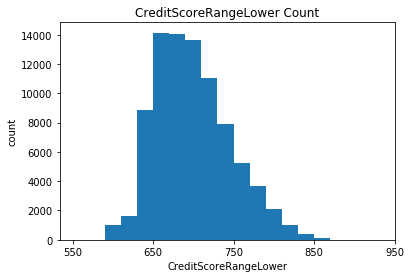

In [29]:
# Histogram for Credit Score ranges for CreditScoreRangeLower

bins = np.arange(550, df2['CreditScoreRangeLower'].max(), 20)
plt.hist(data = df2, x = 'CreditScoreRangeLower', bins = bins);
plt.xticks(np.arange(550, 1000, 100))
plt.title('CreditScoreRangeLower Count')
plt.xlabel('CreditScoreRangeLower')
plt.ylabel('count');


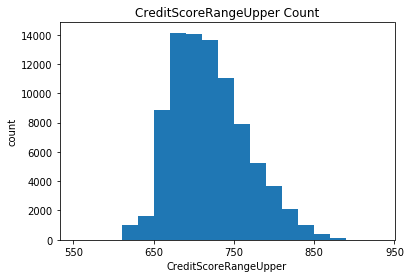

In [30]:
# Histogram for Credit Score ranges for CreditScoreRangeUpper

bins = np.arange(550, df2['CreditScoreRangeUpper'].max(), 20)
plt.hist(data = df2, x = 'CreditScoreRangeUpper', bins = bins);
plt.xticks(np.arange(550, 1000, 100))
plt.title('CreditScoreRangeUpper Count')
plt.xlabel('CreditScoreRangeUpper')
plt.ylabel('count');

> Both Histograms are very similar, and that's to be expected as the upper and lower credits are arranged in constant proportions. 

In [31]:
#see Investors feature and hist
df['Investors'].value_counts()

1       27814
2        1386
3         991
4         827
5         753
8         753
10        728
6         721
9         721
11        717
7         701
34        701
13        700
33        696
27        683
37        681
25        674
29        671
26        668
31        665
21        664
14        661
35        661
24        661
17        657
39        652
19        652
38        650
30        650
23        649
        ...  
1035        1
779         1
735         1
863         1
645         1
695         1
856         1
630         1
838         1
821         1
693         1
647         1
711         1
692         1
800         1
1011        1
840         1
819         1
755         1
691         1
627         1
818         1
754         1
690         1
609         1
881         1
801         1
752         1
715         1
831         1
Name: Investors, Length: 751, dtype: int64

In [32]:
df2['Investors'].describe()

count    84853.000000
mean        68.264669
std         95.195831
min          1.000000
25%          1.000000
50%         32.000000
75%         97.000000
max       1189.000000
Name: Investors, dtype: float64

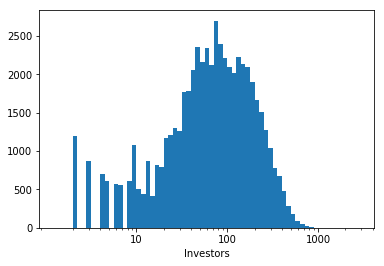

In [33]:
bins = 10 ** np.arange(0.1, 3.5,0.05)
plt.hist(df2['Investors'], bins = bins);
plt.xscale('log')
plt.xticks([1e1, 1e2, 1e3], ['10', '100', '1000'])
plt.xlabel('Investors')
plt.show()

It appears in the distribution that values are significantly skewed. 
The distribution was applied as applied by the professor in the lesson 
Number of investors shows almost a natural distribution with some skewed  from the right 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Distribution is largely normal in most of the analyses we have conducted, especially related to upper and lower credits. 
And there is some discrimination in the owner's job and hisBorrowerAPR
> and Looking at the BorrowerAPR count, two BorrowerAPR counts were higher than the rest of the values. Owing to the large number of counts falling to these two values, these two values can be used for resonable purposes. The two BorrowerAPR values are also left unchanged.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Some features have perverted distributions and a long tail, and have been examined on a logarithmic scale revealing the hidden distribution in some areas.


## Bivariate Exploration


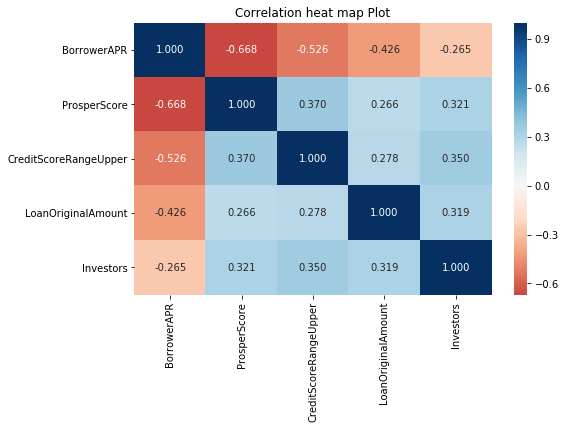

In [34]:

num_vars = ['BorrowerAPR', 'ProsperScore', 
             'CreditScoreRangeUpper','LoanOriginalAmount','Investors']
plt.figure(figsize = [8, 5])
sb.heatmap(df2[num_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'RdBu', center = 0)
plt.title('Correlation heat map Plot') 
plt.show()

 
Can be seen from Correlation heat map Plot
There is a fairly weak reverse relationship between BorrowerAPR and Investors and a relationship between BorrowerAPR and ProsperScore, CreditScoreRangeUpper and LoanOriginalAmount makes sense. 
because borrowers with lower score are more likely to pay higher APR


next:scatter and heat plot for comparing  BorrowerAPR and  ProsperScore 


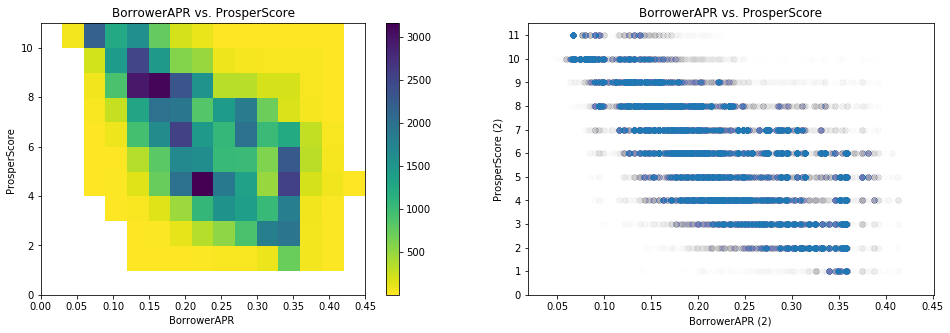

In [35]:
plt.figure(figsize = [16, 5]) 


plt.subplot(1, 2, 1)
bins_x = np.arange(0, df2['BorrowerAPR'].max()+0.05, 0.03)
bins_y = np.arange(0, df2['ProsperScore'].max()+1, 1)
plt.hist2d(data = df2, x = 'BorrowerAPR', y = 'ProsperScore', bins = [bins_x, bins_y], 
               cmap = 'viridis_r', cmin = 0.5)
plt.colorbar()
plt.title('BorrowerAPR vs. ProsperScore')
plt.xlabel('BorrowerAPR ')
plt.ylabel('ProsperScore ');


plt.subplot(1, 2, 2)
plt.scatter(data = df2, x = 'BorrowerAPR', y = 'ProsperScore', alpha =  0.005)
plt.yticks(np.arange(0, 12, 1))

plt.title('BorrowerAPR vs. ProsperScore')
plt.xlabel('BorrowerAPR (2)')
plt.ylabel('ProsperScore (2)');



That makes sense because people with a higher rating tend to be more reliable and therefore get a lower interest rate for the borrower.

next:scatter and heat plot for comparing BorrowerAPR and CreditScoreRangeUpper

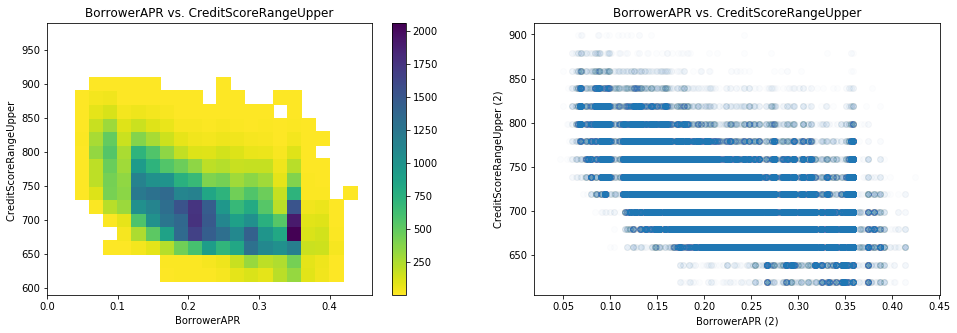

In [36]:
plt.figure(figsize = [16, 5]) 


plt.subplot(1, 2, 1)
bins_x = np.arange(0, df2['BorrowerAPR'].max()+0.05, 0.02)
bins_y = np.arange(590, df2['CreditScoreRangeUpper'].max()+100, 20)
plt.hist2d(data = df2, x = 'BorrowerAPR', y = 'CreditScoreRangeUpper', bins = [bins_x, bins_y], 
               cmap = 'viridis_r', cmin = 0.5)
plt.colorbar()
plt.title('BorrowerAPR vs. CreditScoreRangeUpper')
plt.xlabel('BorrowerAPR ')
plt.ylabel('CreditScoreRangeUpper ');


plt.subplot(1, 2, 2)
plt.scatter(data = df2, x = 'BorrowerAPR', y = 'CreditScoreRangeUpper', alpha =  0.01)\

plt.title('BorrowerAPR vs. CreditScoreRangeUpper')
plt.xlabel('BorrowerAPR (2)')
plt.ylabel('CreditScoreRangeUpper (2)');



>We can see the trend that the higher CreditScore results in a lower APR ratio. The heat map on the same variables helps to illustrate this point further.


next:Violin plot for comparing BorrowerAPR and ProsperScoremean 

In [48]:
# List of ratings in order
rating_order = ['AA', 'A',  'B', 'C', 'D', 'E', 'HR']
# create ordered categorical variable
df2['ProsperRating (Alpha)'] = pd.Categorical(df2['ProsperRating (Alpha)'],
                                               categories= rating_order,
                                               ordered = True)

C:\Users\negmk\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


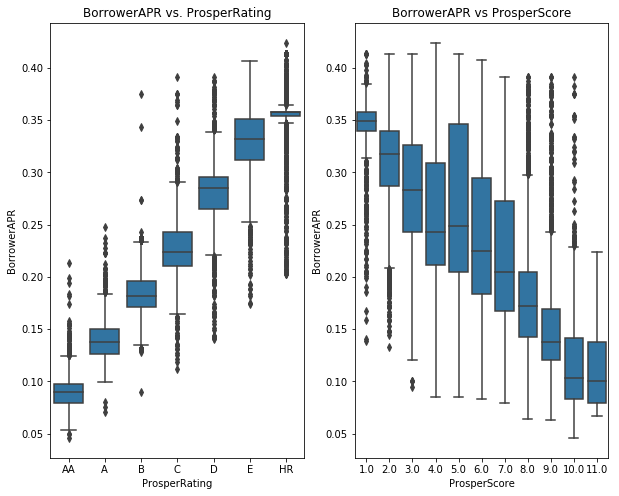

In [49]:
plt.figure(figsize = [15, 5]) 
plt.gcf().set_size_inches(10, 8)


plt.subplot(1, 2, 2)
sb.boxplot(data = df2, x = 'ProsperScore', y = 'BorrowerAPR',color=base_color)
plt.title('BorrowerAPR vs ProsperScore')
plt.xlabel('ProsperScore')
plt.ylabel('BorrowerAPR');

plt.subplot(1, 2, 1)
sb.boxplot(data = df2, x = 'ProsperRating (Alpha)', y = 'BorrowerAPR',color=base_color)
plt.title('BorrowerAPR vs. ProsperRating')
plt.xlabel('ProsperRating')
plt.ylabel('BorrowerAPR');


There is not much overlap on ProsperRating for these two categorical variables. Good or poor scores do not reflect the percentage of APR that the creditor would earn. For ProsperScore, there is obviously a negative association with BorrowerAPR 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

>  Correlation and matrix plots are a great way to understand the data and the way it works.
 For example, BorrowerAPR has negative relationships with almost all the columns we've used. 
On the other hand, the ProsperScore column has positive relationships with the same columns. 
We also noted that ProsperScore has more correlation than BorrowerAPR, so we should pay more attention to it because it is an important point to know how the data works. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Investors , LoanOriginalAmount and CreditScoreRangeUpper  are all positive correlated to ProsperScore and negative correlated to BorrowerAPR And there's an inverse correlation  between them.

## Multivariate Exploration


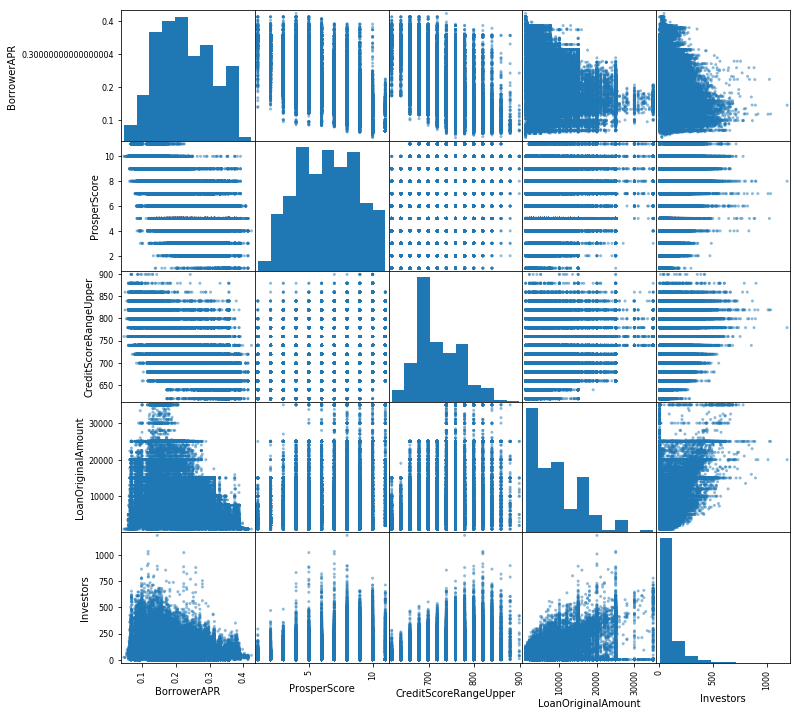

In [38]:
pd.plotting.scatter_matrix(df2[num_vars],figsize = [12, 12]);

BorrowerAPR & ProsperScore & CreditScoreRangeUpper

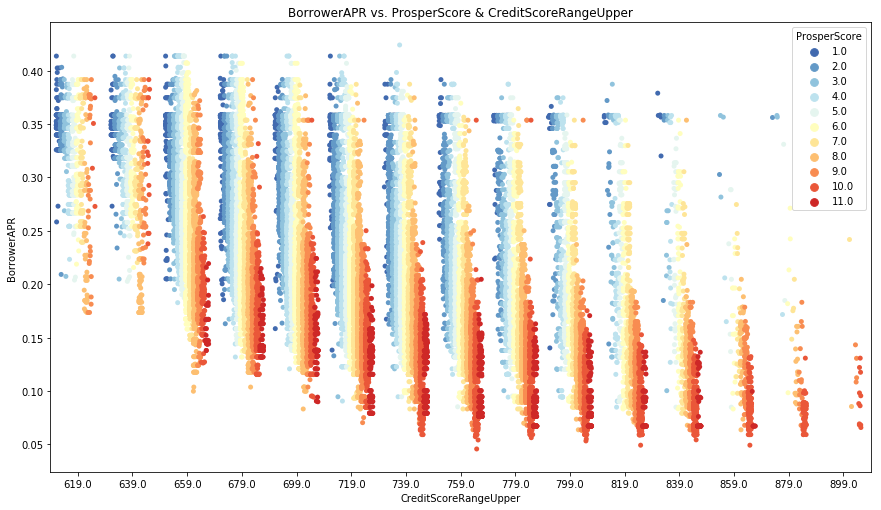

In [47]:
plt.figure(figsize = [14.7, 8.27]) 
sb.stripplot(data = df2, x = 'CreditScoreRangeUpper', y = 'BorrowerAPR', hue ='ProsperScore', jitter = 0.35 , dodge = True , palette ="RdYlBu_r")
plt.title('BorrowerAPR vs. ProsperScore & CreditScoreRangeUpper')
plt.xlabel('CreditScoreRangeUpper')
plt.ylabel('BorrowerAPR');

Since CreditScoreRangeUpper and ProsperScore are optimistic associated with the borrowerAPR, this visualisation allows to see the impact on the BorrowerAPR.
We can see the creditScoreRangeUpper rise with the borrowerAPR fall in parcels. By adding ProsperScore to the colour encodings, the BorrowerAPR decreases as the ProsperScore rise. This proves that CreditScoreRangeUpper and ProsperScore are adversely correlated with BorrowerAPR.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> In the distribution above you can see the extent of the correlation between the three variables and that each variable in one way or another has a role in the other variable and can be explained as explained before 
We can see the creditScoreRangeUpper rise with the borrowerAPR fall in parcels. By adding ProsperScore to the colour encodings, the BorrowerAPR decreases as the ProsperScore rise. This proves that CreditScoreRangeUpper and ProsperScore are adversely correlated with BorrowerAPR.

### Were there any interesting or surprising interactions between features?

> Of all the relationships we analyzed, from univariate exploration to multivariate exploration, we noted that all the features are negatively correlated to BorrowerAPR, most of which were ProspoerScore. 
We also noted that most features are positvyl correlated to prospoerScore.